# 1. 데이터 불러오기_CSV

* 전처리한 csv 데이터 가져오기

In [1]:
# 데이터 처리 및 분석
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 문자
import re

* 판례내용_이유 분석하기

In [2]:
df_labor = pd.read_csv(r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\df_labor_real_cleaned2.csv')

In [3]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5016 non-null   int64 
 1   판례정보일련번호      5016 non-null   int64 
 2   사건번호          5016 non-null   object
 3   선고            5016 non-null   object
 4   판결유형          5016 non-null   object
 5   판시사항          3725 non-null   object
 6   판결요지          3054 non-null   object
 7   참조조문          3724 non-null   object
 8   참조판례          2450 non-null   object
 9   판례내용          5016 non-null   object
 10  판례내용_상단       5016 non-null   object
 11  판례내용_이유       5012 non-null   object
 12  판례내용_이유(전처리)  5016 non-null   object
 13  판례내용_제거(불용어)  5016 non-null   object
dtypes: int64(2), object(12)
memory usage: 548.8+ KB


# 2. 판례내용_이유 : 불용어 삭제


In [4]:
import pandas as pd

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [5]:
#한국어 처리를 의한 라이브러리 사용 
# Counter: 데이터를 카운팅하여 빈도수를 계산하기 위한 모듈, 주로 단어 빈도 계산에 사용
from collections import Counter

# konlpy의 Okt: 한국어 형태소 분석기. 텍스트를 형태소 단위로 분리하거나 품사 태깅에 사용
from konlpy.tag import Okt

# CountVectorizer: 문서에서 단어 빈도 수를 기반으로 피처 벡터를 생성하는 사이킷런의 도구
from sklearn.feature_extraction.text import CountVectorizer

* 불용어 제거 

In [54]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 불용어 파일 로드
stopwords_file_path = r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\sorted_words.txt'
stopwords_pick = ['것', '제', '있었다고', '한다고', '있어', '민복기', '없이', '있는',
                  '000','000원'
                           ]
pattern = r'제\d+|\d+호증|\d+호|\d+달러|\d+원|\d+만원|\d+만|\d+억|\d+억원'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# remove_stopwords 함수 수정
def remove_stopwords(phrase):
    if not isinstance(phrase, str):  # 입력이 문자열이 아닌 경우 빈 문자열 반환
        return ''
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(phrase)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word) # 패턴에 매칭되면 제외
    ]
    return ' '.join(filtered_words)  # 문자열로 반환
def remove_digits_and_letters(text):
    return re.sub(r'\d+[a-zA-Z]+', '', text)


# 불용어 제거 수행 (판례내용 열의 내용을 처리)
df_labor['판례내용_이유(불용어)'] = df_labor['판례내용_이유'].apply(remove_stopwords).apply(remove_digits_and_letters)
apply(lambda x: re.sub(r'\d+[a-zA-Z]+', '', x))

# 결과 확인
print(df_labor['판례내용_이유(불용어)'])

0       지난 보충 보충 한다 제척기간 도과 부당해고 최초 신청 불이익 다투는 신청 허용 근...
1       한다 판시와 협력 업체 고용 △△ 공장 지휘 근로 제공 근로자 파견 근로자 파견 오...
2       지난 보충 보충 한다 근로자 파견 판시와 사내 물류 간접 생산 공정 협력 업체 고용...
3       지난 서면 보충 한다 고용주 근로자 자를 수행 법률관계 파견 근로자 보호 파견 한다...
4       근로기준법 18조 근로시간 사업 종류 통상 근로자 근로시간 하여 짧은 근로자 단시간...
                              ...                        
5011    선거 국회 참의원 재직 재직 1960.10 1961.4 거마비 체류 정보 직무 수당...
5012    김태 지상 유서 퇴직 추첨 선정 하였다는 새로운 장일 회사 경비 절약 시책 감원 조...
5013    심안 목록 토지 재산 단기 4291년 4월 15일 임대 7등 소청 제기 하여 동년 ...
5014    서울특별시 노동 지구 자동차 노동조합 노동 쟁의 중재 판정 있어서 위원 일인 하여 ...
5015    원판 노무 동원 징집 연기 청탁 받고 직무 하여 뇌물 수수하였다는 수뢰죄 본건 금전...
Name: 판례내용_이유(불용어), Length: 5016, dtype: object


* 불용어 제거 수정 코드

In [8]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 불용어 파일 로드
stopwords_file_path = r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\sorted_words.txt'
stopwords_pick = ['것', '제', '있었다고', '한다고', '있어', '민복기', '없이', '있는',
                  '000','000원']
pattern = r'제\d+|\d+호증|\d+호|\d+달러|\d+원|\d+만원|\d+만|\d+억|\d+억원'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# remove_stopwords 함수 수정
def remove_stopwords(phrase):
    if not isinstance(phrase, str):  # 입력이 문자열이 아닌 경우 빈 문자열 반환
        return ''
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(phrase)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)  # 패턴에 매칭되면 제외
    ]
    return ' '.join(filtered_words)  # 문자열로 반환

def remove_digits_and_letters(text):
    # 000, ooo, OOO 반복 제거 및 알파벳과 숫자 조합 제거
    text = re.sub(r'(000|ooo|OOO)+', '', text)  # 반복되는 패턴 제거
    text = re.sub(r'\d+[가-힣]+', '', text)  # 숫자와 알파벳 조합 제거
    return text

# 불용어 제거 수행 (판례내용 열의 내용을 처리)
df_labor['판례내용_이유(불용어)'] = df_labor['판례내용_이유'].apply(remove_stopwords).apply(remove_digits_and_letters)

# 결과 확인
print(df_labor['판례내용_이유(불용어)'])

0       지난 보충 보충 한다 제척기간 도과 부당해고 최초 신청 불이익 다투는 신청 허용 근...
1       한다 판시와 협력 업체 고용 △△ 공장 지휘 근로 제공 근로자 파견 근로자 파견 오...
2       지난 보충 보충 한다 근로자 파견 판시와 사내 물류 간접 생산 공정 협력 업체 고용...
3       지난 서면 보충 한다 고용주 근로자 자를 수행 법률관계 파견 근로자 보호 파견 한다...
4       근로기준법  근로시간 사업 종류 통상 근로자 근로시간 하여 짧은 근로자 단시간 근로...
                              ...                        
5011    선거 국회 참의원 재직 재직 1960.10 1961.4 거마비 체류 정보 직무 수당...
5012    김태 지상 유서 퇴직 추첨 선정 하였다는 새로운 장일 회사 경비 절약 시책 감원 조...
5013    심안 목록 토지 재산 단기    임대  소청 제기 하여 동년   판정 있은 판정 기...
5014    서울특별시 노동 지구 자동차 노동조합 노동 쟁의 중재 판정 있어서 위원 일인 하여 ...
5015    원판 노무 동원 징집 연기 청탁 받고 직무 하여 뇌물 수수하였다는 수뢰죄 본건 금전...
Name: 판례내용_이유(불용어), Length: 5016, dtype: object


In [9]:
# 결과를 cleaned3.csv 파일로 저장
df_labor.to_csv(r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\df_labor_real_cleaned3.csv', index=False, encoding='utf-8-sig')


TF-IDF 수행 : chunk 로 효율성 높이기

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거 (이미 제거되었으므로 stop_words는 필요 없음)
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# 1. 데이터프레임의 '판례내용_제거(불용어)' 열 확인
print("불용어 제거 후 판례 내용:")
print(df_labor['판례내용_이유(불용어)'].head())

# 2. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_result = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 3. 데이터를 청크로 나누어 처리
for i in range(0, len(df_labor), chunk_size):
    # 현재 청크 데이터 추출
    doc_chunk = df_labor['판례내용_이유(불용어)'][i:i + chunk_size]
    
    # TF-IDF 적용
    tfidf_array = vectorizer.fit_transform(doc_chunk)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_result.append(pd.DataFrame(tfidf_array.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{min(i + chunk_size, len(df_labor))}개 문서 처리 완료")  # 마지막 청크의 경우 길이를 초과하지 않도록 수정

# 4. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_df = pd.concat(tfidf_result, ignore_index=True)

# 5. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_df.head())

# 6. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df.shape}")


불용어 제거 후 판례 내용:
0    지난 보충 보충 한다 제척기간 도과 부당해고 최초 신청 불이익 다투는 신청 허용 근...
1    한다 판시와 협력 업체 고용 △△ 공장 지휘 근로 제공 근로자 파견 근로자 파견 오...
2    지난 보충 보충 한다 근로자 파견 판시와 사내 물류 간접 생산 공정 협력 업체 고용...
3    지난 서면 보충 한다 고용주 근로자 자를 수행 법률관계 파견 근로자 보호 파견 한다...
4    근로기준법  근로시간 사업 종류 통상 근로자 근로시간 하여 짧은 근로자 단시간 근로...
Name: 판례내용_이유(불용어), dtype: object
처리 시작...
1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
5016개 문서 처리 완료
최종 결과:
    00  001  002  003  004  005  006  007  008   01  ...  김병로  다름없는  물심  방준경  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN   NaN NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN   NaN NaN  NaN   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN   NaN NaN  NaN   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN   NaN NaN  NaN   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN   NaN NaN  NaN   

   백한성  심안  염부  작업기  차점  파훼  
0  NaN NaN NaN  NaN NaN NaN  
1  NaN NaN NaN  NaN NaN NaN 

## 3-1. tf-idf 상위단어 100개 도출

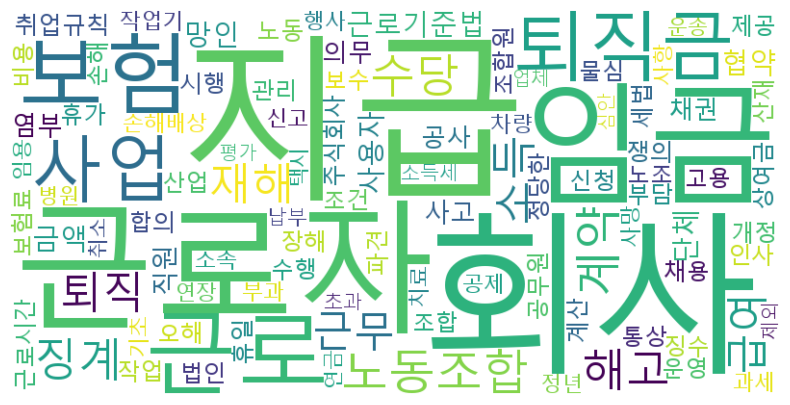

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager

# 한글 폰트 설정 (예: Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서의 경우

# TF-IDF 벡터라이저로 얻은 데이터프레임에서 상위 중요 단어 100개만 시각화
top_n = 100

# 각 단어별 평균 TF-IDF 점수를 계산
tfidf_means = tfidf_df.mean().sort_values(ascending=False)[:top_n]

# 워드클라우드 생성, 한글 폰트 적용
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800, 
    height=400, 
    background_color='white'
).generate_from_frequencies(tfidf_means)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

## 3-2 클러스터링 _K-mean

### 클러스터링

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager

# 한글 폰트 설정 (예: Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서의 경우

# TF-IDF 벡터라이저로 얻은 데이터프레임에서 상위 중요 단어 100개만 시각화
top_n = 100

# 각 단어별 평균 TF-IDF 점수를 계산
tfidf_means = tfidf_df.mean().sort_values(ascending=False)[:top_n]

# 상위 100개 단어 리스트에 저장
top_words = tfidf_means.index.tolist()

# 상위 100개 단어 및 TF-IDF 점수 출력
print("상위 100개 단어 및 TF-IDF 점수:")
for word in top_words:
    print(word, tfidf_means[word])

상위 100개 단어 및 TF-IDF 점수:
지급 0.05239428940044441
회사 0.04928029428939499
근로자 0.048350679334362115
임금 0.04676973467381573
근로 0.036411566592155255
보험 0.032039188057643136
퇴직금 0.030470014421224365
사업 0.028079223586180427
노동조합 0.026975249300920906
계약 0.02606808155703617
수당 0.025092019107338537
징계 0.02491926856304602
소득 0.02464083390108201
해고 0.024020953231924443
재해 0.02340391967884431
퇴직 0.02219665126180585
근무 0.02150058738276004
급여 0.0210533238504933
근로기준법 0.020495139387391507
사용자 0.020091334836288256
협약 0.019444843261511566
망인 0.01900523133639267
단체 0.018687289435718978
금액 0.01853940724819049
사고 0.0166157517098641
염부 0.016552711463176994
직원 0.016239388503059893
의무 0.015446584253666726
공사 0.015045557547710421
채권 0.014931260672304427
노동 0.014341228357859255
취업규칙 0.013891861976721735
법인 0.013182768410815438
고용 0.013142328201893764
주식회사 0.01308106438040046
산업 0.012997654309453143
시행 0.012935163431747597
장해 0.01259877649564776
쟁의 0.012453841871161253
손해 0.012416555945312026
통상 0.0123452572924680

In [32]:
import pandas as pd

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

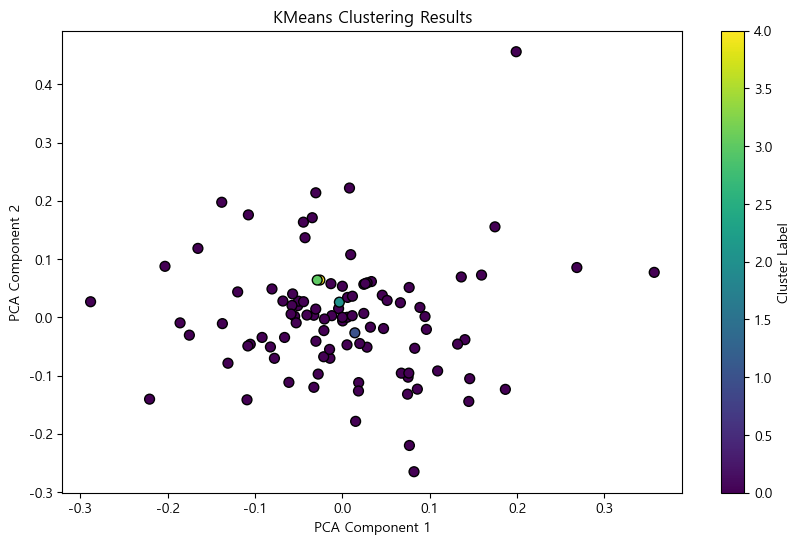

Cluster 0 Keywords: 지급, 회사, 근로자, 임금, 근로, 보험, 퇴직금, 사업, 노동조합, 계약, 수당, 징계, 소득, 해고, 재해, 퇴직, 근무, 급여, 사용자, 협약, 망인, 단체, 금액, 사고, 염부, 직원, 의무, 공사, 채권, 노동, 취업규칙, 법인, 고용, 주식회사, 산업, 시행, 쟁의, 손해, 통상, 제공, 개정, 관리, 휴가, 합의, 오해, 노조, 공무원, 근로시간, 작업, 조합, 인사, 보수, 신청, 징수, 부담, 수행, 조합원, 조건, 채용, 보험료, 정당한, 세법, 물심, 운영, 산재, 파견, 비용, 계산, 손해배상, 신고, 차량, 부과, 작업기, 소속, 사망, 과세, 행사, 치료, 연장, 공제, 정년, 사항, 병원, 임용, 기초, 납부, 택시, 취소, 운송, 연금, 소득세, 심안, 초과, 평가, 업체, 제외
Cluster 1 Keywords: 근로기준법
Cluster 2 Keywords: 상여금
Cluster 3 Keywords: 휴일
Cluster 4 Keywords: 장해


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud


# 데이터프레임 생성
df_top_words = pd.DataFrame(top_words, columns=['words'])

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_top_words['words'])

# K-means 클러스터링 수행
k = 5  # 클러스터 수 (필요에 따라 조정 가능)
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X)

# 클러스터 레이블 얻기
df_top_words['Cluster'] = kmeans.labels_

# PCA를 이용한 차원 축소
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# 클러스터 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_top_words['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KMeans Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 각 클러스터의 상위 키워드 출력
for i in range(k):
    cluster_keywords = df_top_words[df_top_words['Cluster'] == i]['words'].tolist()
    print(f'Cluster {i} Keywords: {", ".join(cluster_keywords)}')  # 각 클러스터의 키워드 출력

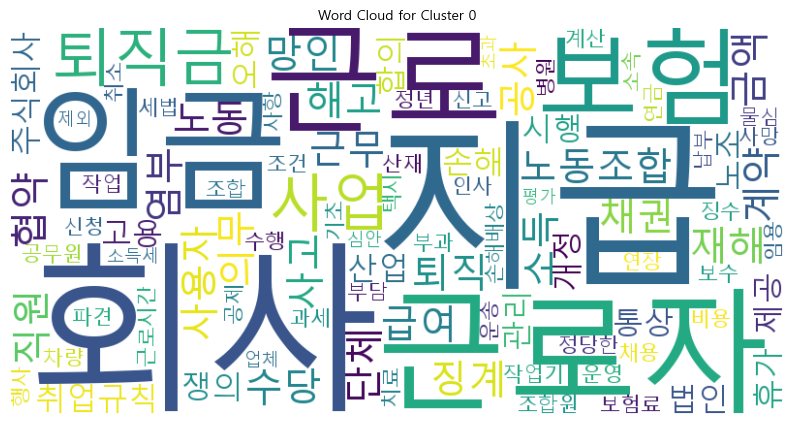

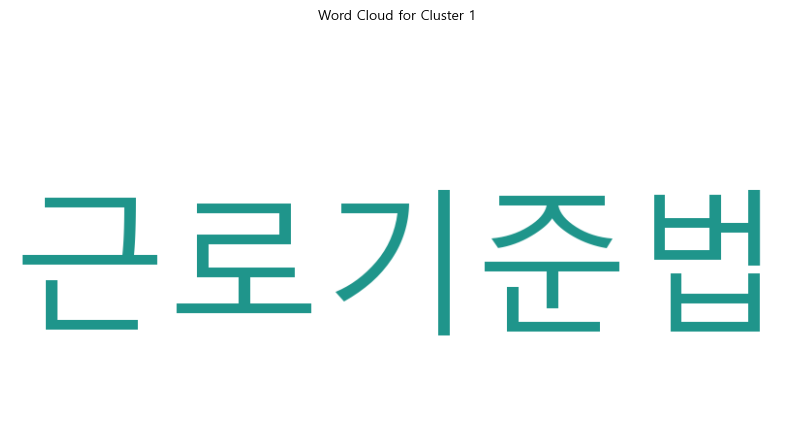

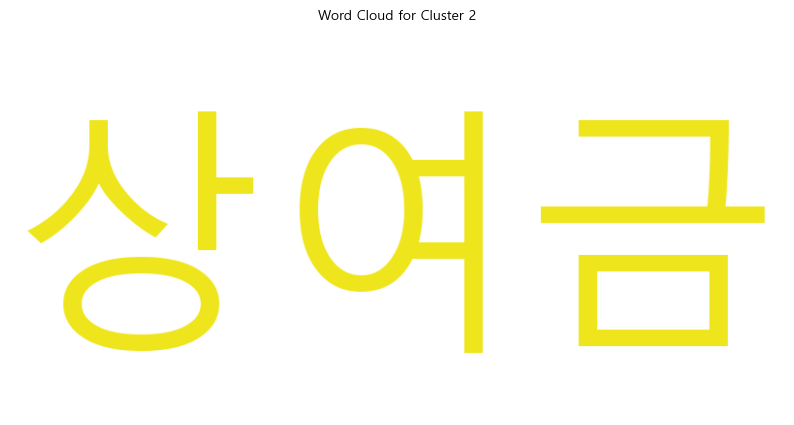

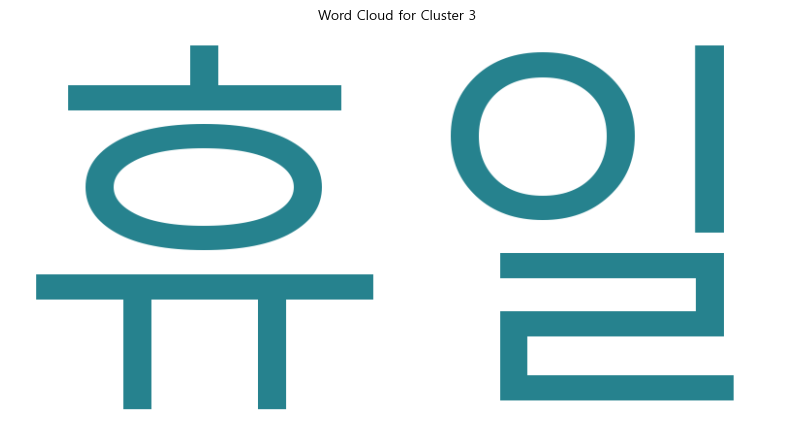

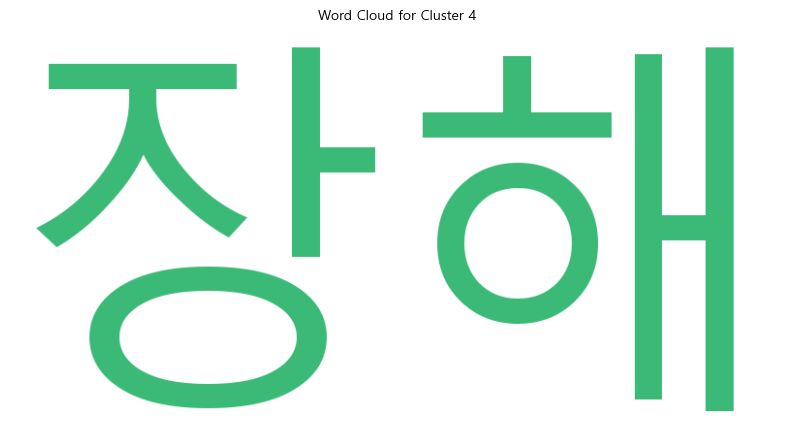

In [41]:
# 각 클러스터의 상위 단어 시각화
for i in range(k):
    cluster_words = df_top_words[df_top_words['Cluster'] == i]['words'].tolist()
    
    # WordCloud 생성 시 한글 폰트 지정
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(' '.join(cluster_words))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {i}', fontproperties=font_prop)  # 폰트 속성 추가
    plt.show()

* 유사도 기반 분류

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 유사도 분석 대상 단어 리스트
words = [
    "지급", "회사", "근로자", "임금", "근로", "보험", "퇴직금", "사업", "노동조합", "계약", "수당", "징계", 
    "소득", "해고", "재해", "퇴직", "근무", "급여", "사용자", "협약", "망인", "단체", "금액", "사고", 
    "염부", "직원", "의무", "공사", "채권", "노동", "취업규칙", "법인", "고용", "주식회사", "산업", 
    "시행", "쟁의", "손해", "통상", "제공", "개정", "관리", "휴가", "합의", "오해", "노조", "공무원", 
    "근로시간", "작업", "조합", "인사", "보수", "신청", "징수", "부담", "수행", "조합원", "조건", 
    "채용", "보험료", "정당한", "세법", "물심", "운영", "산재", "파견", "비용", "계산", "손해배상", 
    "신고", "차량", "부과", "작업기", "소속", "사망", "과세", "행사", "치료", "연장", "공제", "정년", 
    "사항", "병원", "임용", "기초", "납부", "택시", "취소", "운송", "연금", "소득세", "심안", "초과", 
    "평가", "업체", "제외", "근로기준법", "상여금", "휴일", "장해"
]

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(words)

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix)

# 유사도 데이터프레임 생성
similarity_df = pd.DataFrame(cosine_similarities, index=words, columns=words)

# 유사도 기준 설정 (예: 0.5 이상 유사도인 경우 같은 그룹으로 묶기)
similarity_threshold = 0.5

# 각 단어를 중심으로 유사도가 기준 이상인 단어들을 그룹으로 생성
groups = {}
for word in words:
    similar_words = similarity_df[word][similarity_df[word] >= similarity_threshold].index.tolist()
    groups[word] = similar_words

# 결과 출력
for key, group in groups.items():
    print(f"{key} 그룹: {group}")


지급 그룹: ['지급']
회사 그룹: ['회사']
근로자 그룹: ['근로자']
임금 그룹: ['임금']
근로 그룹: ['근로']
보험 그룹: ['보험']
퇴직금 그룹: ['퇴직금']
사업 그룹: ['사업']
노동조합 그룹: ['노동조합']
계약 그룹: ['계약']
수당 그룹: ['수당']
징계 그룹: ['징계']
소득 그룹: ['소득']
해고 그룹: ['해고']
재해 그룹: ['재해']
퇴직 그룹: ['퇴직']
근무 그룹: ['근무']
급여 그룹: ['급여']
사용자 그룹: ['사용자']
협약 그룹: ['협약']
망인 그룹: ['망인']
단체 그룹: ['단체']
금액 그룹: ['금액']
사고 그룹: ['사고']
염부 그룹: ['염부']
직원 그룹: ['직원']
의무 그룹: ['의무']
공사 그룹: ['공사']
채권 그룹: ['채권']
노동 그룹: ['노동']
취업규칙 그룹: ['취업규칙']
법인 그룹: ['법인']
고용 그룹: ['고용']
주식회사 그룹: ['주식회사']
산업 그룹: ['산업']
시행 그룹: ['시행']
쟁의 그룹: ['쟁의']
손해 그룹: ['손해']
통상 그룹: ['통상']
제공 그룹: ['제공']
개정 그룹: ['개정']
관리 그룹: ['관리']
휴가 그룹: ['휴가']
합의 그룹: ['합의']
오해 그룹: ['오해']
노조 그룹: ['노조']
공무원 그룹: ['공무원']
근로시간 그룹: ['근로시간']
작업 그룹: ['작업']
조합 그룹: ['조합']
인사 그룹: ['인사']
보수 그룹: ['보수']
신청 그룹: ['신청']
징수 그룹: ['징수']
부담 그룹: ['부담']
수행 그룹: ['수행']
조합원 그룹: ['조합원']
조건 그룹: ['조건']
채용 그룹: ['채용']
보험료 그룹: ['보험료']
정당한 그룹: ['정당한']
세법 그룹: ['세법']
물심 그룹: ['물심']
운영 그룹: ['운영']
산재 그룹: ['산재']
파견 그룹: ['파견']
비용 그룹: ['비용']
계산 그룹: ['계산']
손해배상 그룹: ['손해배상']


In [47]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# # 100개의 예시 단어
# top_words = [
#     '근로', '임금', '퇴직금', '계약', '근로기준법',
#     '보험', '노동조합', '해고', '재해', '퇴직',
#     '근무', '수당', '징계', '근로자', '사업',
#     '소득', '공무원', '직원', '조건', '파견',
#     '산재', '신청', '휴가', '금액', '세법',
#     '소속', '시행', '조합원', '보험료', '행사',
#     '퇴직연금', '채용', '고용', '소득세', '징수',
#     '전환', '상여금', '업체', '장해', '물심',
#     '상담', '합의', '증명서', '부담', '해결',
#     '자격', '급여', '인사', '노조', '조정',
#     '세금', '물가', '법인', '업무', '공제',
#     '통상', '의무', '소득원', '경비', '법률',
#     '사업자', '이의', '배상', '예산', '상해',
#     '기초', '복지', '과세', '고소', '사고',
#     '적용', '규정', '유지', '교육', '소득공제',
#     '상환', '제공', '지급', '진행', '재직',
#     '소통', '보수', '승진', '이행', '해지']


# 주제별 키워드 정의
topics = {
    '노동': ['근로', '임금', '퇴직금', '노동조합', '해고'],
    '법률': ['계약', '법률', '소송', '규정', '이의'],
    '보험': ['보험', '퇴직연금', '산재', '보험료', '소득세'],
    '근로': ['근로자','일용직','사무직','인력','사원','고용','직원'],
    '퇴직': ['은퇴','사직','이직','퇴직','정년','명예퇴직'],
    '휴가': ['연차','휴식','휴직','정기휴가','주말','법정휴가','유급휴가','병가']
}

# 주제와 단어 리스트로 데이터프레임 생성
df_top_words = pd.DataFrame(top_words, columns=['words'])

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_top_words['words'])

# 주제 키워드를 TF-IDF 벡터화
topic_keywords = [' '.join(keywords) for keywords in topics.values()]
topic_tfidf_matrix = vectorizer.transform(topic_keywords)

# 코사인 유사도 계산
similarity = cosine_similarity(tfidf_matrix, topic_tfidf_matrix)

# 가장 유사한 주제 찾기
df_top_words['Topic'] = similarity.argmax(axis=1)

# 결과 출력
for topic_index, words in enumerate(df_top_words['words']):
    print(f'단어: {words} -> 주제: {list(topics.keys())[list(topics.values()).index(topic_index)]}')


ValueError: 0 is not in list

중심단어 보기

In [26]:
# 클러스터 중심 단어 출력 및 리스트 저장
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
terms = vectorizer.get_feature_names_out()  # 단어 목록

# 클러스터 중심 단어를 저장할 딕셔너리
cluster_keywords = {}

for i in range(num_clusters):
    cluster_keywords[i] = []  # 각 클러스터에 대한 빈 리스트 생성
    print(f"\n클러스터 {i + 1}의 중심 단어:")
    for ind in order_centroids[i, :10]:  # 각 클러스터에서 상위 10개 단어
        keyword = terms[ind]
        cluster_keywords[i].append(keyword)  # 중심 단어를 리스트에 추가
        print(f" {keyword}")

# 클러스터 중심 단어 리스트 확인
print("\n클러스터 중심 단어 리스트:")
for cluster_num, keywords in cluster_keywords.items():
    print(f"클러스터 {cluster_num + 1}: {keywords}")



클러스터 1의 중심 단어:
 노동조합
 쟁의
 노조
 단체
 조합원
 협약
 노동
 조합
 회사
 교섭

클러스터 2의 중심 단어:
 퇴직금
 퇴직
 지급
 회사
 임금
 근로자
 근로기준법
 근로
 개정
 직원

클러스터 3의 중심 단어:
 망인
 사망
 재해
 인과관계
 질병
 보험
 스트레스
 차량
 회사
 근무

클러스터 4의 중심 단어:
 임금
 수당
 지급
 근로
 근로시간
 통상
 휴일
 휴가
 근로자
 근로기준법

클러스터 5의 중심 단어:
 회사
 지급
 사업
 있는
 근로자
 계약
 주식회사
 000원
 근로
 재해

클러스터 6의 중심 단어:
 징계
 해고
 회사
 노동조합
 협약
 인사
 단체
 취업규칙
 근로자
 징계처분

클러스터 7의 중심 단어:
 채권
 파견
 배당
 근로자
 임금
 추심
 업체
 협력
 고용
 압류

클러스터 8의 중심 단어:
 소득
 세법
 과세
 금액
 법인
 징수
 부과
 세액
 소득세
 귀속

클러스터 9의 중심 단어:
 근로자
 계약
 해고
 근로
 회사
 임용
 갱신
 정년
 사용자
 근로기준법

클러스터 10의 중심 단어:
 보험
 재해
 장해
 급여
 산재
 산업
 보험료
 지급
 사업
 근로자

클러스터 중심 단어 리스트:
클러스터 1: ['노동조합', '쟁의', '노조', '단체', '조합원', '협약', '노동', '조합', '회사', '교섭']
클러스터 2: ['퇴직금', '퇴직', '지급', '회사', '임금', '근로자', '근로기준법', '근로', '개정', '직원']
클러스터 3: ['망인', '사망', '재해', '인과관계', '질병', '보험', '스트레스', '차량', '회사', '근무']
클러스터 4: ['임금', '수당', '지급', '근로', '근로시간', '통상', '휴일', '휴가', '근로자', '근로기준법']
클러스터 5: ['회사', '지급', '사업', '있는', '근로자', '계약', '주식회사', '000원', '근로', '재해']
클러스터 6: ['징계', 

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {kmeans.cluster_centers_[i, ind]}")


클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 노동조합 - TF-IDF 값: 0.2068132496830092
단어: 쟁의 - TF-IDF 값: 0.1315740436434694
단어: 노조 - TF-IDF 값: 0.10621596206527005
단어: 단체 - TF-IDF 값: 0.07836880680535808
단어: 조합원 - TF-IDF 값: 0.0762066993722635
단어: 협약 - TF-IDF 값: 0.07478492827685322
단어: 노동 - TF-IDF 값: 0.06555998655586069
단어: 조합 - TF-IDF 값: 0.061768118899701976
단어: 회사 - TF-IDF 값: 0.05920978856050339
단어: 교섭 - TF-IDF 값: 0.05822911781124429

클러스터 2:
단어: 퇴직금 - TF-IDF 값: 0.29996344668712105
단어: 퇴직 - TF-IDF 값: 0.13384518028098763
단어: 지급 - TF-IDF 값: 0.1314357705607872
단어: 회사 - TF-IDF 값: 0.09265504868430163
단어: 임금 - TF-IDF 값: 0.08209660699875435
단어: 근로자 - TF-IDF 값: 0.07437291173424589
단어: 근로기준법 - TF-IDF 값: 0.04956048762893942
단어: 근로 - TF-IDF 값: 0.042626639606584915
단어: 개정 - TF-IDF 값: 0.04114441120381152
단어: 직원 - TF-IDF 값: 0.04038019937392954

클러스터 3:
단어: 망인 - TF-IDF 값: 0.3900815470330269
단어: 사망 - TF-IDF 값: 0.1080912953926567
단어: 재해 - TF-IDF 값: 0.09612754593651635
단어: 인과관계 - TF-IDF 값: 0.053352093664763615
단어: 질병

* 시각화 : 워드클라우드

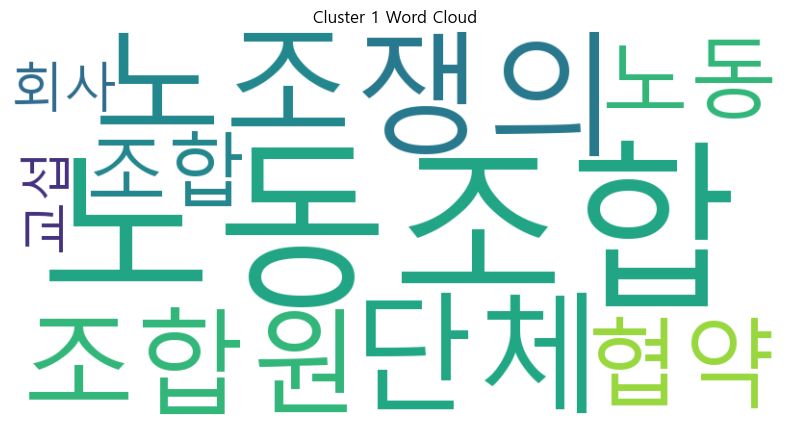

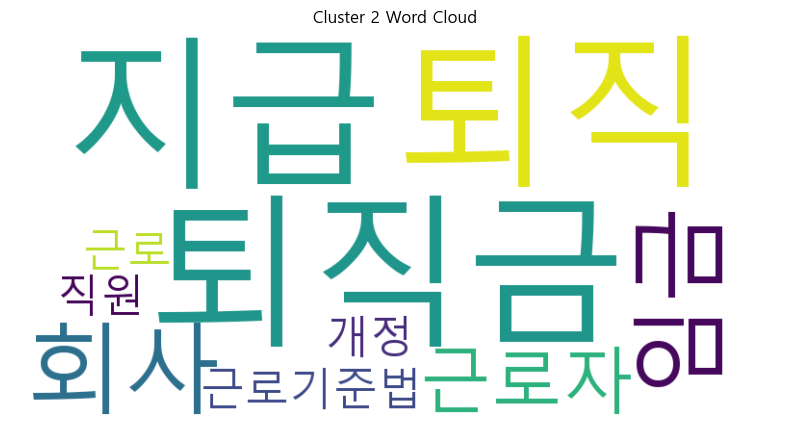

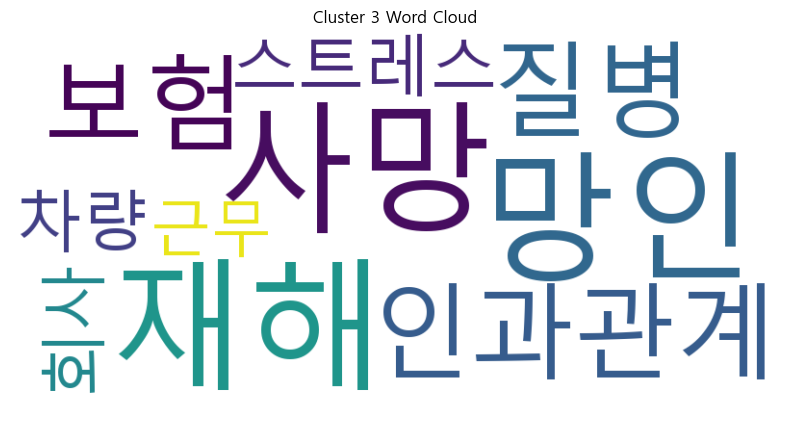

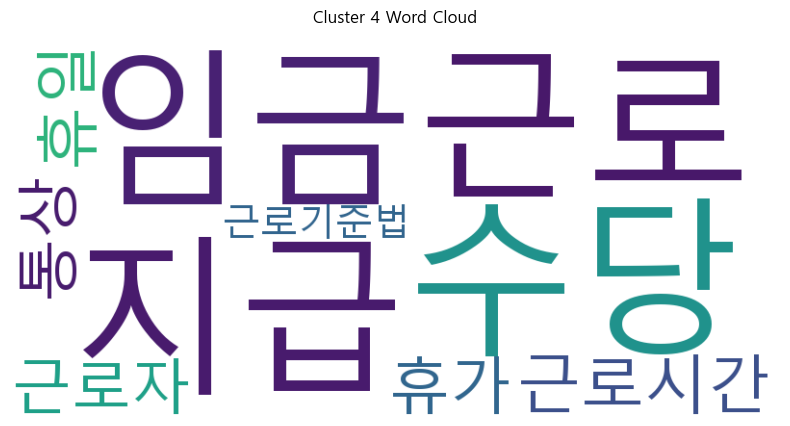

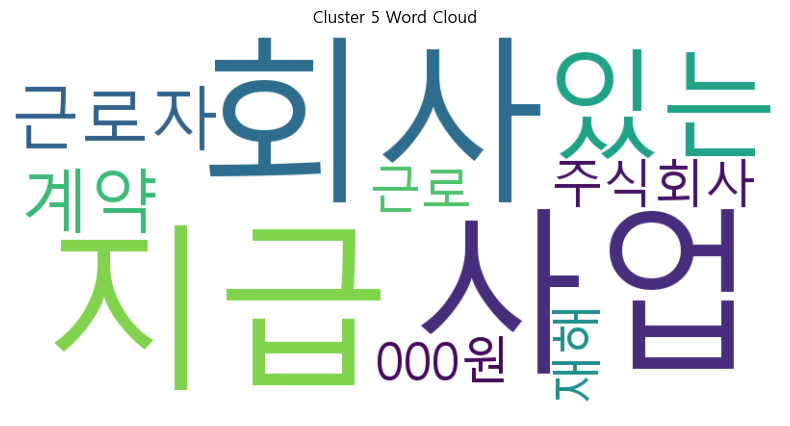

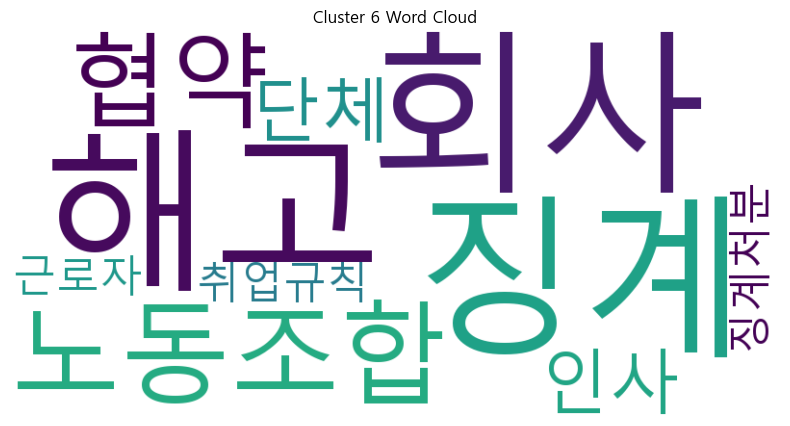

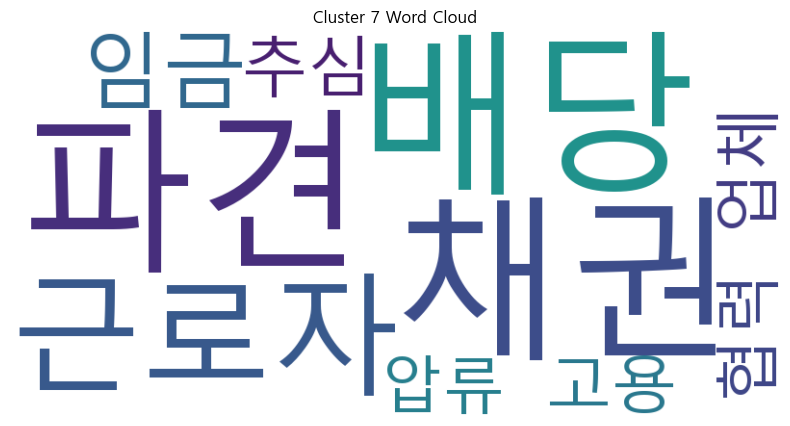

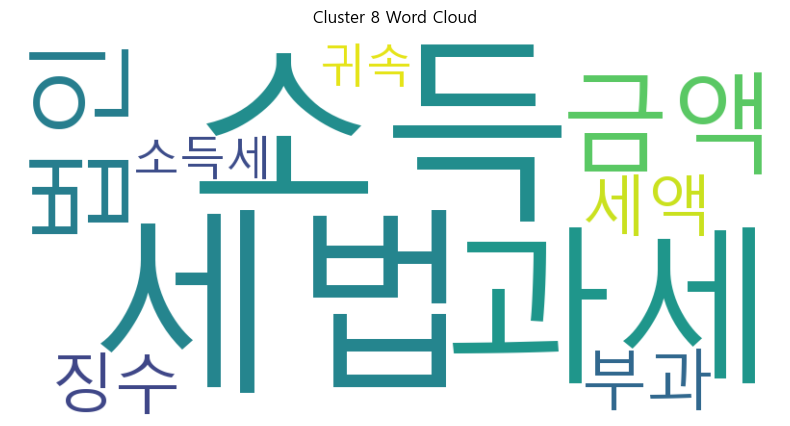

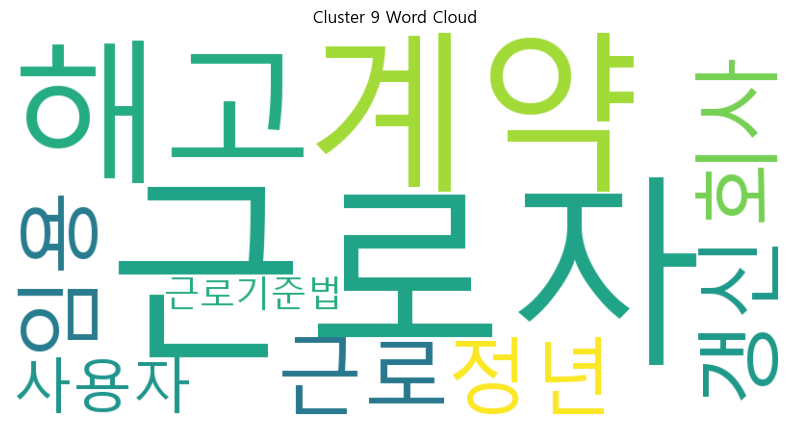

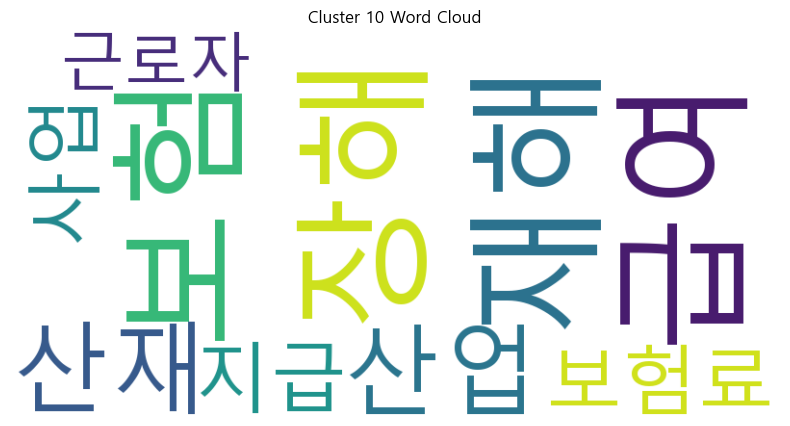

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정 (예: "malgun.ttf" 폰트를 사용할 경우)
font_path = "malgun.ttf"  # 적절한 폰트 경로로 교체하세요.

# 클러스터별 워드 클라우드 생성
for cluster_num, keywords in cluster_keywords.items():
    wordcloud_text = ' '.join(keywords)
    
    wordcloud = WordCloud(
        font_path=font_path,     # 한글 폰트 경로 설정
        width=800,
        height=400,
        background_color='white'
    ).generate(wordcloud_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_num + 1} Word Cloud')
    plt.show()


2차원 차원 축소 시각화

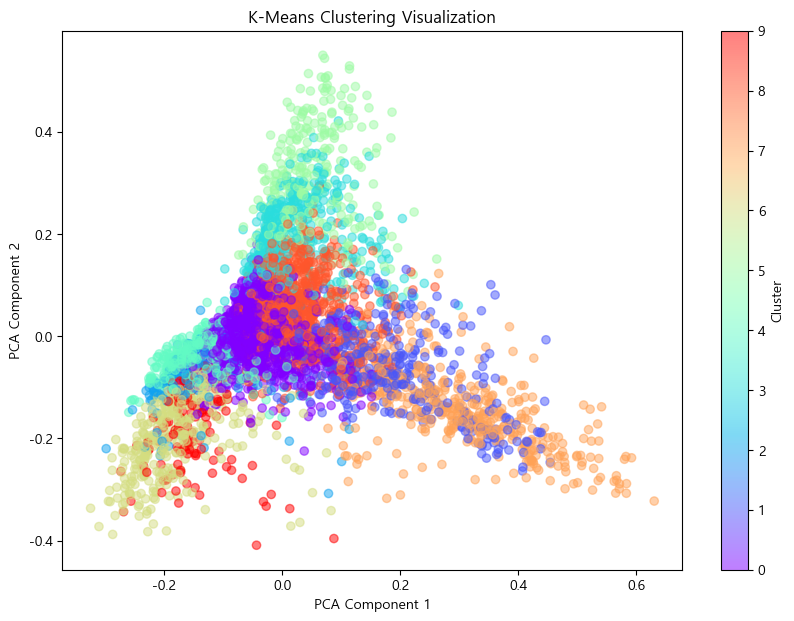

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# 9. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_array.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_labor['클러스터'], cmap='rainbow', alpha=0.5)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [49]:
# 6. 클러스터 중심 계산
cluster_centers = kmeans.cluster_centers_

# 7. 각 클러스터의 중심 단어 추출
def get_top_keywords_for_clusters(cluster_centers, vectorizer, n_words=10):
    order_centroids = cluster_centers.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
    terms = vectorizer.get_feature_names_out()  # 단어 목록
    
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_keywords[i] = [terms[ind] for ind in order_centroids[i, :n_words]]  # 상위 n_words 단어
    
    return cluster_keywords

# 8. 클러스터 중심 단어 출력
cluster_keywords = get_top_keywords_for_clusters(cluster_centers, vectorizer)
for cluster_num, keywords in cluster_keywords.items():
    print(f"\n클러스터 {cluster_num + 1}의 중심 단어들: {', '.join(keywords)}")


클러스터 1의 중심 단어들: 회사, 지급, 채권, 사업, 있는, 000원, 이를, 임금, 주식회사, 손해

클러스터 2의 중심 단어들: 퇴직금, 퇴직, 지급, 회사, 임금, 근로자, 근로기준법, 공사, 개정, 근로

클러스터 3의 중심 단어들: 망인, 사망, 재해, 인과관계, 질병, 스트레스, 차량, 회사, 보험, 근무

클러스터 4의 중심 단어들: 노동조합, 쟁의, 노조, 단체, 협약, 조합원, 노동, 회사, 조합, 교섭

클러스터 5의 중심 단어들: 소득, 세법, 과세, 금액, 징수, 부과, 소득세, 세액, 귀속, 법인

클러스터 6의 중심 단어들: 징계, 해고, 회사, 노동조합, 협약, 인사, 단체, 취업규칙, 근로자, 징계처분

클러스터 7의 중심 단어들: 보험, 재해, 산재, 보험료, 사업, 급여, 산업, 지급, 근로자, 공단

클러스터 8의 중심 단어들: 임금, 수당, 지급, 근로시간, 근로, 휴일, 통상, 휴가, 근로자, 근로기준법

클러스터 9의 중심 단어들: 근로자, 계약, 근로, 해고, 회사, 파견, 지급, 사업, 사용자, 임금

클러스터 10의 중심 단어들: 장해, 요양, 등급, 재해, 상병, 보험, 급여, 진폐, 연금, 지급


# 4. 시각화 하기

클러스터_키워드 상위 중요 단어 워드클라우드로 표시

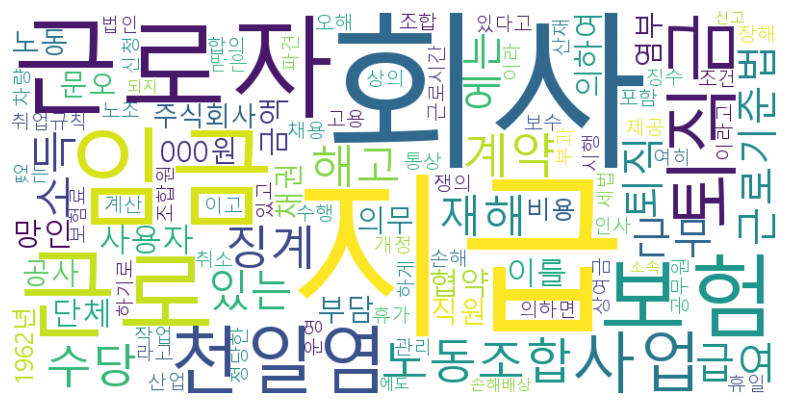

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager

# 한글 폰트 설정 (예: Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서의 경우

# TF-IDF 벡터라이저로 얻은 데이터프레임에서 상위 중요 단어 100개만 시각화
top_n = 100

# 각 단어별 평균 TF-IDF 점수를 계산
tfidf_means = tfidf_df.mean().sort_values(ascending=False)[:top_n]

# 워드클라우드 생성, 한글 폰트 적용
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800, 
    height=400, 
    background_color='white'
).generate_from_frequencies(tfidf_means)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

1. 클러스터링된 키워드로 네트워크 분석
네트워크 분석은 클러스터 내에서 또는 클러스터 간 키워드들 간의 관계를 시각화하는 방법입니다. 이를 위해서는 클러스터링된 결과에서 각 클러스터의 주요 키워드를 추출하고, 그 키워드 간의 연결을 생성하는 작업이 필요합니다

In [65]:
# 각 클러스터에서 주요 키워드 추출 (상위 10개 키워드 예시)
top_n = 10  # 클러스터당 상위 키워드 개수
clusters_top_keywords = {}

for cluster_num in range(num_clusters):
    cluster_docs = tfidf_df[df_labor['클러스터'] == cluster_num]  # 해당 클러스터의 문서들
    top_keywords = cluster_docs.sum().sort_values(ascending=False).head(top_n).index
    clusters_top_keywords[cluster_num] = top_keywords

# 각 클러스터에서 추출된 상위 키워드를 확인
for cluster, keywords in clusters_top_keywords.items():
    print(f"클러스터 {cluster}의 상위 키워드: {keywords}")

클러스터 0의 상위 키워드: Index(['회사', '지급', '채권', '있는', '사업', '000원', '이를', '주식회사', '임금', '근로자'], dtype='object')
클러스터 1의 상위 키워드: Index(['퇴직금', '퇴직', '지급', '회사', '임금', '근로자', '근로기준법', '개정', '공사', '직원'], dtype='object')
클러스터 2의 상위 키워드: Index(['망인', '사망', '재해', '인과관계', '질병', '스트레스', '차량', '회사', '보험', '근무'], dtype='object')
클러스터 3의 상위 키워드: Index(['노동조합', '쟁의', '노조', '단체', '협약', '조합원', '노동', '회사', '조합', '교섭'], dtype='object')
클러스터 4의 상위 키워드: Index(['소득', '세법', '과세', '금액', '부과', '징수', '소득세', '귀속', '법인', '세액'], dtype='object')
클러스터 5의 상위 키워드: Index(['징계', '해고', '회사', '노동조합', '협약', '인사', '단체', '취업규칙', '근로자', '징계처분'], dtype='object')
클러스터 6의 상위 키워드: Index(['보험', '재해', '산재', '보험료', '사업', '급여', '산업', '지급', '근로자', '공단'], dtype='object')
클러스터 7의 상위 키워드: Index(['임금', '수당', '지급', '근로시간', '통상', '휴가', '휴일', '근로자', '근로기준법', '상여금'], dtype='object')
클러스터 8의 상위 키워드: Index(['근로자', '계약', '해고', '회사', '파견', '지급', '사업', '사용자', '임금', '근무'], dtype='object')
클러스터 9의 상위 키워드: Index(['장해', '요양', '등급', '재해', '상병', '보험', '급여',

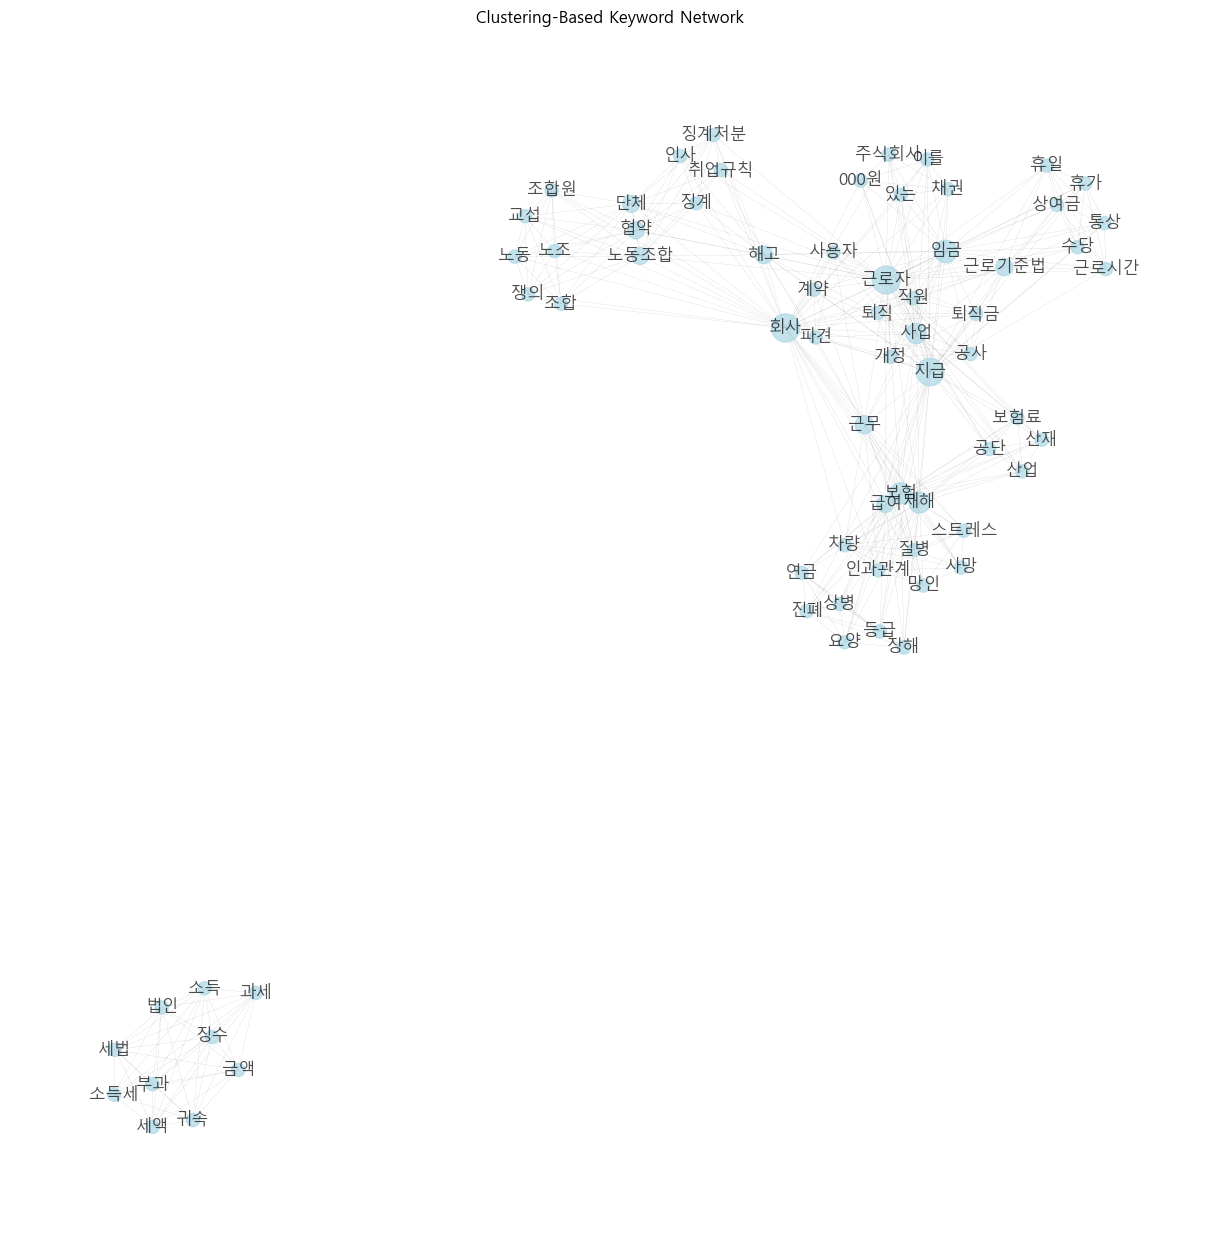

In [69]:
# 필요한 패키지 import
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc
import platform

# 한글폰트 설정 (윈도우즈에서만)
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

# 마이너스 폰트 설정 (깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# 네트워크 그래프 생성
G = nx.Graph()

# 클러스터별 키워드를 노드로 추가하고, 키워드 간 엣지 설정
for cluster, keywords in clusters_top_keywords.items():
    for keyword in keywords:
        G.add_node(keyword, cluster=cluster)  # 노드 추가
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            G.add_edge(keywords[i], keywords[j])  # 엣지 추가

# 노드 라벨 설정
for node in G.nodes():
    G.nodes[node]['label'] = node  # 노드 이름을 라벨로 설정

# 레이아웃 설정 (스프링 레이아웃)
pos = nx.spring_layout(G, k=0.3)  # k 값 조절하여 노드 간 간격 조절

# 노드 크기 설정 (degree를 기반으로)
node_sizes = [d for n, d in G.degree()]

# 시각화
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, font_family=plt.rcParams['font.family'],  # 윈도우즈에서는 한글 폰트 사용
        node_size=[d * 10 for d in node_sizes],  # 노드 크기 조절
        node_color='lightblue',
        alpha=0.7,  # 노드 투명도
        width=0.1,  # 선 두께
        edge_color='gray')
plt.title('Clustering-Based Keyword Network')
plt.show()

코드 설명:
상삼각행렬: 코사인 유사도 행렬은 대칭 행렬이므로, 대각선 상단 부분(상삼각행렬)만을 고려하여 최대값을 찾습니다. 이를 위해 np.triu() 함수를 사용하여 상삼각행렬을 추출하고, 대각선(k=1)은 제외합니다.
최대값 인덱스 찾기: np.argmax()를 사용하여 상삼각행렬에서 가장 큰 값을 가진 인덱스를 찾습니다.
단어 쌍 추출: 해당 인덱스를 이용해 all_keywords 리스트에서 가장 높은 상관관계를 가진 두 단어를 추출하여 출력합니다.
결과 출력: 가장 높은 상관관계 값을 가진 단어 쌍과 그 상관관계 값을 출력합니다.

In [75]:
import numpy as np

# 1. 코사인 유사도 행렬에서 상삼각행렬의 최대값 찾기
# 유사도 행렬의 대각선은 자기 자신과의 유사도(항상 1)임을 감안하여 대각선 위의 값들만 고려
upper_triangle = np.triu(cosine_sim_matrix, k=1)  # k=1로 대각선은 제외

# 2. 최대값의 인덱스 추출
max_idx = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)

# 3. 해당 인덱스에 해당하는 단어 쌍 출력
word1 = all_keywords[max_idx[0]]
word2 = all_keywords[max_idx[1]]
max_value = cosine_sim_matrix[max_idx[0], max_idx[1]]

print(f"가장 높은 상관관계를 가진 단어 쌍: '{word1}'와 '{word2}'")
print(f"상관관계 값: {max_value:.4f}")


가장 높은 상관관계를 가진 단어 쌍: '협약'와 '단체'
상관관계 값: 0.9418


In [76]:
import numpy as np

# 1. 코사인 유사도 행렬에서 상삼각행렬 추출 (대각선 제외)
upper_triangle = np.triu(cosine_sim_matrix, k=1)

# 2. 상위 30개의 상관관계 값과 그 인덱스를 추출
# flatten으로 1차원 배열로 변환 후, 상위 30개의 인덱스를 argsort로 정렬된 순서에서 뒤에서 30개 추출
top_30_indices = np.argsort(upper_triangle.flatten())[-30:]

# 3. 해당 인덱스들을 2차원으로 변환 (단어 쌍 인덱스 추출)
top_30_indices_2d = np.array(np.unravel_index(top_30_indices, upper_triangle.shape)).T

# 4. 상위 30개 단어 쌍과 그 상관관계 값을 출력
print("상위 30개 상관관계가 높은 단어 쌍:")
for idx_pair in top_30_indices_2d:
    word1 = all_keywords[idx_pair[0]]
    word2 = all_keywords[idx_pair[1]]
    similarity_value = cosine_sim_matrix[idx_pair[0], idx_pair[1]]
    print(f"'{word1}'와 '{word2}' - 상관관계 값: {similarity_value:.4f}")

상위 30개 상관관계가 높은 단어 쌍:
'근로기준법'와 '근로자' - 상관관계 값: 0.4943
'산재'와 '보험' - 상관관계 값: 0.4985
'스트레스'와 '질병' - 상관관계 값: 0.5001
'과세'와 '세법' - 상관관계 값: 0.5029
'지급'와 '퇴직금' - 상관관계 값: 0.5053
'있는'와 '근로자' - 상관관계 값: 0.5072
'수당'와 '휴일' - 상관관계 값: 0.5114
'단체'와 '노동조합' - 상관관계 값: 0.5115
'금액'와 '소득' - 상관관계 값: 0.5159
'인과관계'와 '스트레스' - 상관관계 값: 0.5202
'임금'와 '수당' - 상관관계 값: 0.5228
'조합원'와 '노동조합' - 상관관계 값: 0.5245
'산업'와 '보험' - 상관관계 값: 0.5263
'징계처분'와 '징계' - 상관관계 값: 0.5280
'징수'와 '소득세' - 상관관계 값: 0.5287
'퇴직'와 '퇴직금' - 상관관계 값: 0.5351
'과세'와 '소득' - 상관관계 값: 0.5389
'지급'와 '수당' - 상관관계 값: 0.5461
'수당'와 '통상' - 상관관계 값: 0.5469
'있는'와 '이를' - 상관관계 값: 0.5500
'재해'와 '보험' - 상관관계 값: 0.5791
'사용자'와 '근로자' - 상관관계 값: 0.5794
'임금'와 '통상' - 상관관계 값: 0.6133
'사망'와 '망인' - 상관관계 값: 0.6258
'재해'와 '산업' - 상관관계 값: 0.6552
'소득'와 '세법' - 상관관계 값: 0.6572
'임금'와 '지급' - 상관관계 값: 0.6591
'인과관계'와 '질병' - 상관관계 값: 0.6609
'등급'와 '장해' - 상관관계 값: 0.7110
'협약'와 '단체' - 상관관계 값: 0.9418
